## Multilayer Perceptron

In [1]:
import torch
import torch.nn as nn

import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
# Hyperparameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 50
batch_size = 100
learning_rate = 0.001

- MNISTはPyTorchの標準機能でデータセットをダウンロードできる
- バッチ単位で読み込めるDataLoaderも簡単に使える

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

- DataSetのlen()はサンプル数を返す
- DataLoaderのlen()はミニバッチ数を返す

In [4]:
print(len(train_dataset))  # 60000
print(len(test_dataset))   # 10000
print(len(train_loader))   # 600
print(len(test_loader))    # 100

60000
10000
600
100


- DataLoaderから1バッチ分のデータを取り出す方法
- DataLoaderをiterで囲んでnext()すればよい

In [5]:
# 1データだけ取得
image, label = iter(train_loader).next()
print(type(image))   # <class 'torch.FloatTensor'>
print(type(label))   # <class 'torch.LongTensor'>
print(image.size())  # torch.Size([100, 1, 28, 28])
print(label.size())  # torch.Size([100])

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([100, 1, 28, 28])
torch.Size([100])


(-0.5, 145.5, 145.5, -0.5)

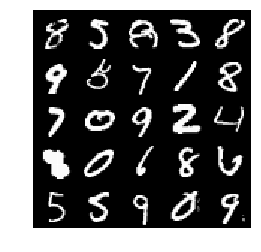

In [6]:
# 可視化
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    npimg = img.numpy()
    # [c, h, w] => [h, w, c]
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = iter(train_loader).next()
images, labels = images[:25], labels[:25]
imshow(torchvision.utils.make_grid(images, nrow=5, padding=1))
plt.axis('off')

In [7]:
class MultiLayerPerceptron(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
#         print(x.size())
        out = self.fc1(x)
#         print(out.size())
        out = self.relu(out)
#         print(out.size())
        out = self.fc2(out)
#         print(out.size())
        return out

- Sequentialを使ってまとめて書く方法もある
- forward処理中に出力値を見られる

In [15]:
model = MultiLayerPerceptron(input_size, hidden_size, num_classes)

In [16]:
# テスト
image, label = iter(train_loader).next()
print("befire view:", image.size())
image = image.view(-1, 28 * 28)
print("after view:", image.size())
output = model(image)
print(output.size())

befire view: torch.Size([100, 1, 28, 28])
after view: torch.Size([100, 784])
torch.Size([100, 10])


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
def train(train_loader):
    model.train()
    running_loss = 0
    for batch_idx, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28 * 28)
        
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss = running_loss / len(train_loader)
    
    return train_loss


def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    for batch_idx, (images, labels) in enumerate(test_loader):
        images = images.view(-1, 28 * 28)

        outputs = model(images)

        loss = criterion(outputs, labels)
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)

    val_loss = running_loss / len(test_loader)
    val_acc = correct.float() / total
    
    return val_loss, val_acc


loss_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)

    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f'
          % (epoch, loss, val_loss, val_acc))
    
    # logging
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 2.2276 val_loss: 2.1488 val_acc: 0.5230
epoch 1, loss: 2.0729 val_loss: 1.9791 val_acc: 0.7124
epoch 2, loss: 1.8919 val_loss: 1.7798 val_acc: 0.7401
epoch 3, loss: 1.6870 val_loss: 1.5648 val_acc: 0.7583
epoch 4, loss: 1.4785 val_loss: 1.3595 val_acc: 0.7808
epoch 5, loss: 1.2890 val_loss: 1.1827 val_acc: 0.8003
epoch 6, loss: 1.1307 val_loss: 1.0397 val_acc: 0.8160
epoch 7, loss: 1.0047 val_loss: 0.9280 val_acc: 0.8243
epoch 8, loss: 0.9059 val_loss: 0.8407 val_acc: 0.8337
epoch 9, loss: 0.8282 val_loss: 0.7718 val_acc: 0.8405
epoch 10, loss: 0.7664 val_loss: 0.7166 val_acc: 0.8482
epoch 11, loss: 0.7162 val_loss: 0.6714 val_acc: 0.8541
epoch 12, loss: 0.6750 val_loss: 0.6339 val_acc: 0.8599
epoch 13, loss: 0.6406 val_loss: 0.6027 val_acc: 0.8648
epoch 14, loss: 0.6114 val_loss: 0.5758 val_acc: 0.8682
epoch 15, loss: 0.5863 val_loss: 0.5528 val_acc: 0.8706
epoch 16, loss: 0.5646 val_loss: 0.5327 val_acc: 0.8736
epoch 17, loss: 0.5457 val_loss: 0.5151 val_acc: 0.8762
ep

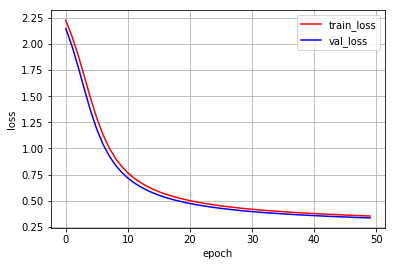

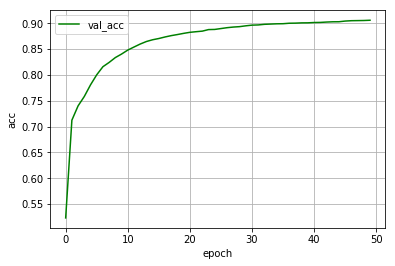

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot learning curve
plt.figure()
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.grid()